# Linear Regression in Python

In [1]:

from IPython.display import VimeoVideo
# Tutorial Video Name: Linear Regression in Python
VimeoVideo('645349467', width=720, height=480)

https://vimeo.com/645349467

## Assumptions of Linear Regression
1. Linear relationship.
1. Multivariate normality. 
1. No or little multicollinearity.
1. No auto-correlation. 
1. Homoscedasticity.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy.stats import bartlett
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Read in Data
df = pd.read_csv('../../Data/worldHappiness.csv')

In [3]:
# View Data
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
potential_predictors = ['Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

### Check for linear relationships

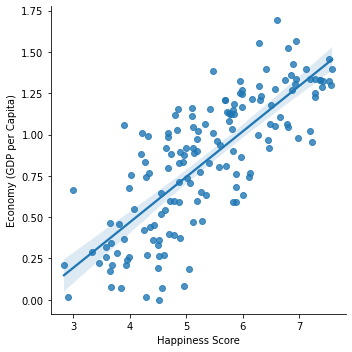

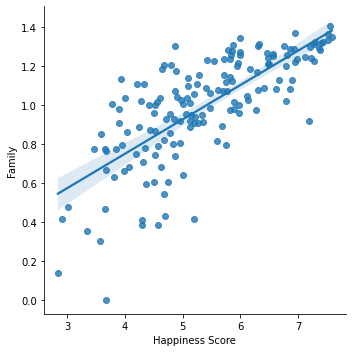

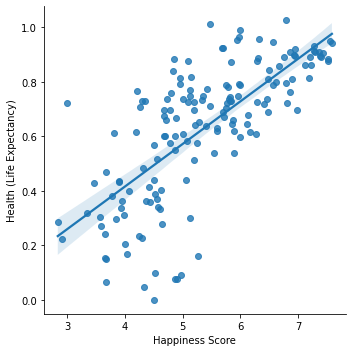

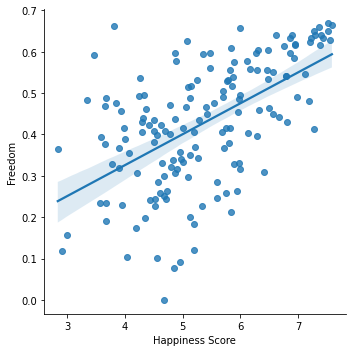

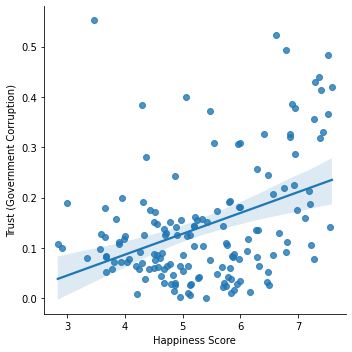

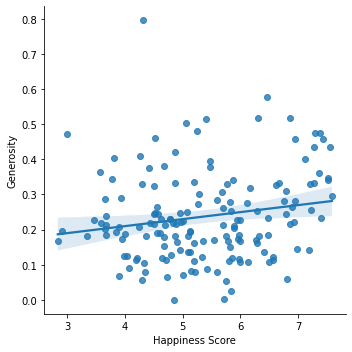

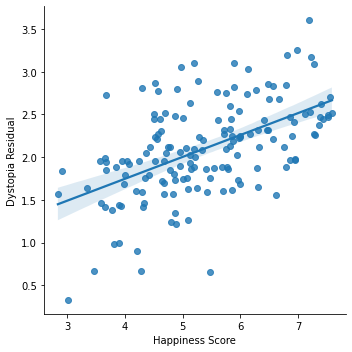

In [5]:
for pp in potential_predictors:
    sns.lmplot(x='Happiness Score',y=pp,data=df,fit_reg=True) 

In [6]:
# Select predictors
selected_predictors = ['Economy (GDP per Capita)', 'Generosity']

In [7]:
df[selected_predictors].corr()

,Economy (GDP per Capita),Generosity
Economy (GDP per Capita),1.000000,-0.010465
Generosity,-0.010465,1.000000


In [9]:
# Check multivariate normality
pg.multivariate_normality(df[selected_predictors], alpha=.05)

HZResults(hz=4.022040826951795, pval=3.379894916967259e-09, normal=False)

### Violates assumption here, but we will continue with example

In [10]:
stat, p = bartlett(df['Economy (GDP per Capita)'], df['Generosity'])
print(stat)
print(p)

174.83350218671836
6.509769599686971e-40


### Violates assumption here, but we will continue with example

### Set up train-test split

In [11]:
X = df[selected_predictors]

In [12]:
y = df['Happiness Score']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
preds = lr.predict(X_test)

<AxesSubplot:ylabel='Happiness Score'>

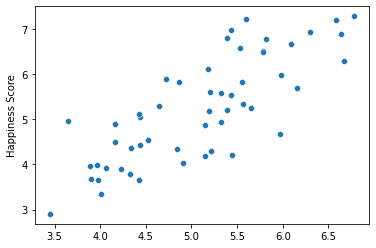

In [17]:
sns.scatterplot(x=preds, y=y_test)

In [18]:
coefs = pd.DataFrame()

In [19]:
coefs['Coefs'] = lr.coef_

In [20]:
lr.coef_

array([2.16513136, 2.0224652 ])

In [21]:
coefs.index = lr.feature_names_in_

In [22]:
lr.feature_names_in_

array(['Economy (GDP per Capita)', 'Generosity'], dtype=object)

In [23]:
coefs

,Coefs
Economy (GDP per Capita),2.165131
Generosity,2.022465


<AxesSubplot:>

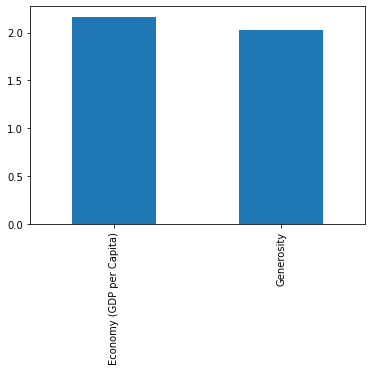

In [24]:
coefs['Coefs'].plot(kind='bar')

In [25]:
r2_score(y_test, preds)

0.6113430600524418